# Dataset utilizado

O conjunto de dados utilizado nesta análise exploratória é o [Car Accidents in Brazil (2017-2023)](https://www.kaggle.com/datasets/mlippo/car-accidents-in-brazil-2017-2023) que reune dados (como o data, período, local,causa, número de pessoas envolvidas,  etc.) de acidentes de carros em rodovias do Brasil no período de Janeiro de 2017 a Agosto de 2023.


## Etapas do trabalho
- [x] Leitura e Exploração Inicial
- [x] Limpeza e Tratamento
- [ ] Análise Específica


<img src="https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExdTc4eGppd3pxYXlhdnJsdXF1Y3Fvemt6YXI2dDMxOWE0aG52bHdmeiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9cw/YmtRl1avJzTaMndDZs/giphy.gif" width="200px" align="right">



# Perguntas para nortear a pesquisa
- [X] Dias com mais acidentes?
- [x] Causas mais comuns de acidentes?
- [x] Condição do tempo que mais causa acidentes?
- [x] Tipos mais comuns de acidente?
- [x] Número de feridos/tipo de feridos
- [x] Turno com mais acidentes?
- [x] Estados com mais acidentes?
- [x] Traçado via com mais e menos acidentes?
- [ ] Verificar a quilometragem com mais acidentes


# Leitura e Exploração Inicial

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.dates as mdates

import folium
from folium.plugins import HeatMap, MousePosition
from folium import plugins


# Alterando estilo dos gráficos
sns.set_style('darkgrid')

# Definindo um tamanho padrão para os gráficos únicos
FIGSIZE = (12,6)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlippo/car-accidents-in-brazil-2017-2023")

print("Path to dataset files:", path)

100%|██████████| 41.0M/41.0M [00:01<00:00, 22.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mlippo/car-accidents-in-brazil-2017-2023/versions/1


In [ ]:
os.listdir('/root/.cache/kagglehub/datasets/mlippo/car-accidents-in-brazil-2017-2023/versions/1')

['accidents_2017_to_2023_english.csv', 'accidents_2017_to_2023_portugues.csv']

In [ ]:
df = pd.read_csv(os.path.join(path, 'accidents_2017_to_2023_portugues.csv'))

In [ ]:
rows, cols = df.shape

print(f'O dataset possui {rows} linhas e {cols} colunas')

O dataset possui 463152 linhas e 27 colunas


In [ ]:
df.head()

,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia
0,2017-01-01,domingo,01:45:00,RS,116.0,"34,9",VACARIA,Defeito Mecânico no Veículo,Colisão traseira,Com Vítimas Feridas,...,4,0,2,0,4,2,-28.50712,-50.94118,SPRF-RS,DEL05-RS
1,2017-01-01,domingo,01:00:00,PR,376.0,636,TIJUCAS DO SUL,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Fatais,...,0,0,1,0,0,2,-25.75400,-49.12660,SPRF-PR,DEL01-PR
2,2017-01-01,domingo,04:40:00,BA,101.0,65,ENTRE RIOS,Condutor Dormindo,Colisão frontal,Com Vítimas Fatais,...,1,1,2,0,2,2,-11.96180,-38.09530,SPRF-BA,DEL01-BA
3,2017-01-01,domingo,06:30:00,PA,316.0,"72,5",CASTANHAL,Falta de Atenção à Condução,Colisão lateral,Com Vítimas Fatais,...,0,0,3,0,0,3,-1.28998,-47.83483,SPRF-PA,DEL01-PA
4,2017-01-01,domingo,09:00:00,GO,20.0,"220,5",POSSE,Defeito na Via,Colisão com objeto estático,Com Vítimas Feridas,...,2,1,0,0,3,1,-14.14221,-46.32259,SPRF-DF,DEL02-DF


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463152 entries, 0 to 463151
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   data_inversa            463152 non-null  object 
 1   dia_semana              463152 non-null  object 
 2   horario                 463152 non-null  object 
 3   uf                      463152 non-null  object 
 4   br                      462162 non-null  float64
 5   km                      462162 non-null  object 
 6   municipio               463152 non-null  object 
 7   causa_acidente          463152 non-null  object 
 8   tipo_acidente           463112 non-null  object 
 9   classificacao_acidente  463152 non-null  object 
 10  fase_dia                463152 non-null  object 
 11  sentido_via             463152 non-null  object 
 12  condicao_metereologica  463152 non-null  object 
 13  tipo_pista              463152 non-null  object 
 14  tracado_via         

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
br,462162.0,213.432900,1.307576e+02,1.000000e+01,101.00000,163.000000,324.000000,498.0
pessoas,463152.0,2.362373,1.924801e+00,1.000000e+00,1.00000,2.000000,3.000000,80.0
mortos,463152.0,0.079235,3.321686e-01,0.000000e+00,0.00000,0.000000,0.000000,21.0
feridos_leves,463152.0,0.835469,1.075275e+00,0.000000e+00,0.00000,1.000000,1.000000,61.0
feridos_graves,463152.0,0.259530,6.028139e-01,0.000000e+00,0.00000,0.000000,0.000000,31.0
ilesos,463152.0,1.044070,1.502419e+00,0.000000e+00,0.00000,1.000000,1.000000,73.0
ignorados,463152.0,0.144069,4.381678e-01,0.000000e+00,0.00000,0.000000,0.000000,54.0
feridos,463152.0,1.094999,1.205351e+00,0.000000e+00,0.00000,1.000000,1.000000,66.0
veiculos,463152.0,1.645725,7.313938e-01,1.000000e+00,1.00000,2.000000,2.000000,23.0
latitude,463152.0,-2343.286739,1.519113e+06,-1.033383e+09,-25.33123,-20.420335,-12.826570,163.0


In [ ]:
df.columns

Index(['data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio',
       'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia',
       'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia'],
      dtype='object')

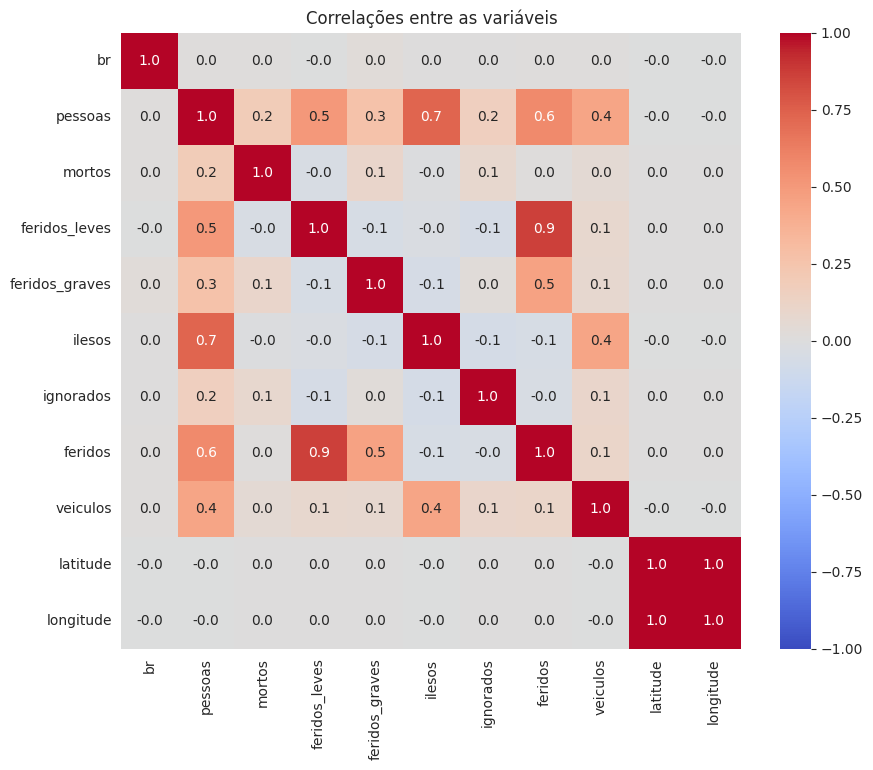

In [ ]:
# Verificando as correlações

plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlações entre as variáveis')
plt.show()

# Tratamento e Limpeza

In [ ]:
# Convertendo a data para o time datetime
df['data_inversa'] = pd.to_datetime(df['data_inversa'])

In [ ]:
# Criando a coluna de mês e ano
df['ano'] = df['data_inversa'].dt.year
df['mes'] = df['data_inversa'].dt.month

In [ ]:
# Selecionando os dados que não serão utilizados
excluidos = ['horario', 'ignorados', 'regional', 'delegacia']
df = df.drop(columns=excluidos)

Os acidentes são categorizados como:

In [ ]:
df['classificacao_acidente'].unique()

array(['Com Vítimas Feridas', 'Com Vítimas Fatais', 'Sem Vítimas'],
      dtype=object)

# Análise Exploratória de Dados

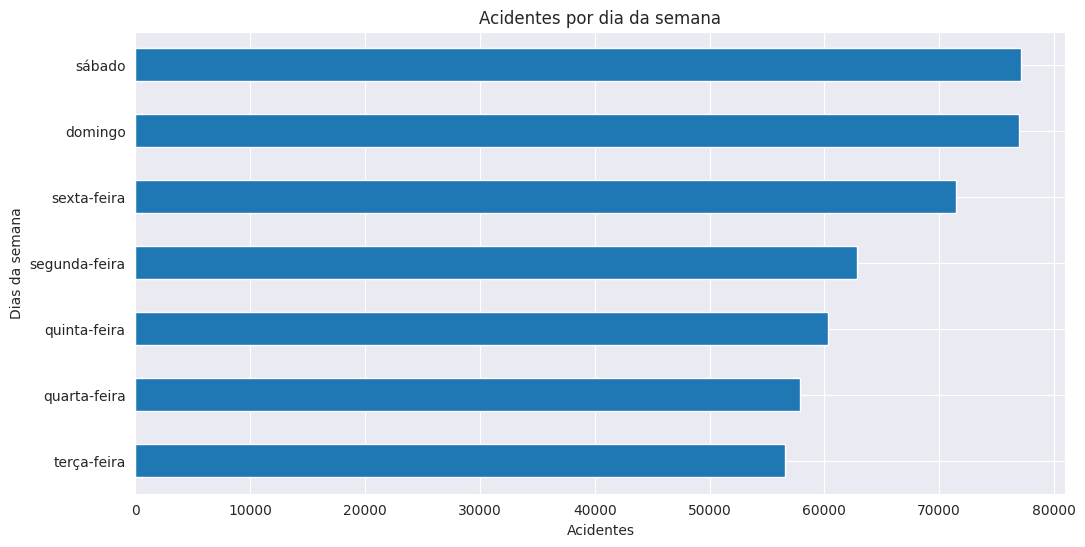

In [ ]:
# Analise dos dias da semana
x = df['dia_semana'].value_counts().sort_values(ascending=True)

x.plot(kind='barh', figsize=FIGSIZE)
plt.xlabel('Acidentes')
plt.ylabel('Dias da semana')
plt.title('Acidentes por dia da semana')
plt.show()

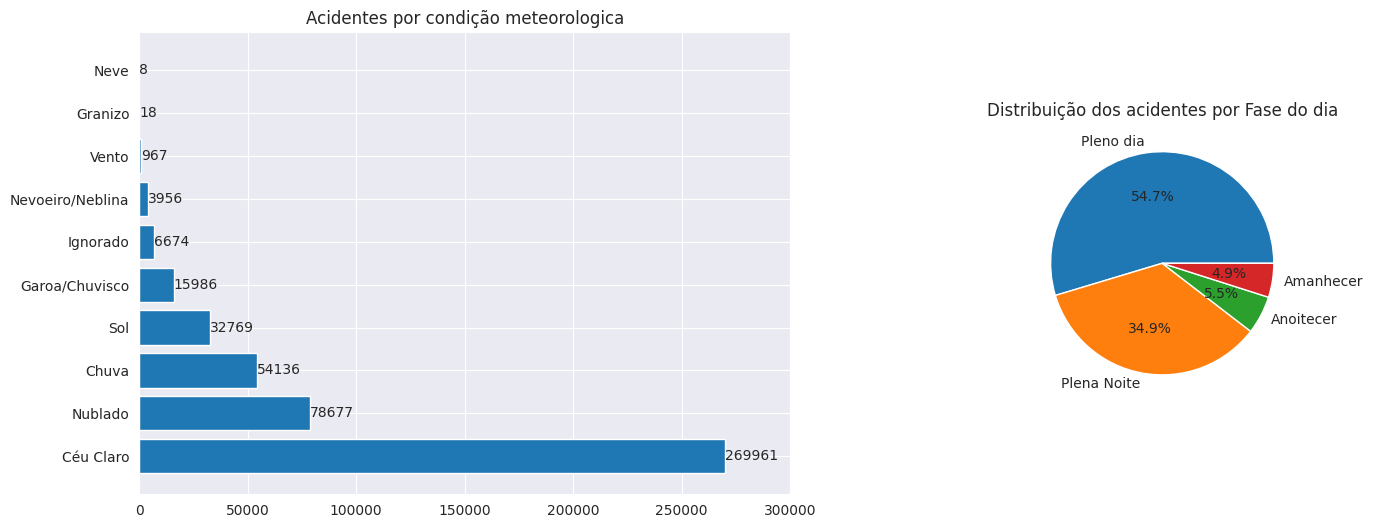

In [ ]:
# Fase do dia e condição meteorologica

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6), gridspec_kw={'width_ratios': (0.7, 0.3)})
fig.subplots_adjust(wspace=0.5)

labels2 = df['fase_dia'].value_counts().index
values2 = df['fase_dia'].value_counts()
ax[1].pie(values2, labels=labels2, autopct='%1.1f%%')
ax[1].set_title('Distribuição dos acidentes por Fase do dia')


labels1 = df['condicao_metereologica'].value_counts().index
values1 = df['condicao_metereologica'].value_counts()
barh = ax[0].barh(labels1, values1)
ax[0].set_xlim((0,300_000))
ax[0].bar_label(barh)
ax[0].set_title('Acidentes por condição meteorologica')


plt.show()

In [ ]:
# Verificando o traçado da via e a condição meteoreologica
pd.crosstab(df['tracado_via'], df['condicao_metereologica'], margins=True)

condicao_metereologica,Chuva,Céu Claro,Garoa/Chuvisco,Granizo,Ignorado,Neve,Nevoeiro/Neblina,Nublado,Sol,Vento,All
tracado_via,,,,,,,,,,,
Curva,16569,34516,4035,5,984,3,845,12252,4199,100,73508
Desvio Temporário,1816,6915,468,1,180,0,129,1916,800,34,12259
Interseção de vias,1248,12155,607,1,237,0,112,3549,1777,34,19720
Não Informado,7449,32651,2116,2,615,0,622,10262,4790,137,58644
Ponte,264,1419,89,0,29,0,26,398,166,4,2395
Reta,25453,171303,8115,9,4383,5,2085,47267,19553,621,278794
Retorno Regulamentado,421,3147,147,0,79,0,39,863,466,14,5176
Rotatória,601,5692,286,0,133,0,72,1497,676,15,8972
Túnel,46,326,16,0,3,0,4,108,22,0,525


In [ ]:
# Verificando o traçado da via e a classificação do acidente
pd.crosstab(df['tracado_via'], df['classificacao_acidente'], margins=True)

classificacao_acidente,Com Vítimas Fatais,Com Vítimas Feridas,Sem Vítimas,All
tracado_via,,,,
Curva,5159,50531,17818,73508
Desvio Temporário,1018,8474,2767,12259
Interseção de vias,518,15699,3503,19720
Não Informado,4696,41747,12201,58644
Ponte,226,1572,597,2395
Reta,19303,200892,58599,278794
Retorno Regulamentado,137,3893,1146,5176
Rotatória,180,6663,2129,8972
Túnel,15,372,138,525


In [ ]:
pd.crosstab(df['causa_acidente'], df['classificacao_acidente'], margins=True).sort_values(by='Com Vítimas Fatais', ascending=False).head(10)

classificacao_acidente,Com Vítimas Fatais,Com Vítimas Feridas,Sem Vítimas,All
causa_acidente,,,,
All,31344,332213,99595,463152
Falta de Atenção à Condução,4963,80358,22467,107788
Velocidade Incompatível,3753,29686,10283,43722
Falta de Atenção do Pedestre,2395,5485,196,8076
Desobediência às normas de trânsito pelo condutor,2376,22973,3970,29319
Ultrapassagem Indevida,1684,6856,1403,9943
Transitar na contramão,1612,3285,521,5418
Condutor Dormindo,1399,11801,3620,16820
Ingestão de Álcool,1256,13057,7828,22141


In [ ]:
df['classificacao_acidente'].unique()

array(['Com Vítimas Feridas', 'Com Vítimas Fatais', 'Sem Vítimas'],
      dtype=object)

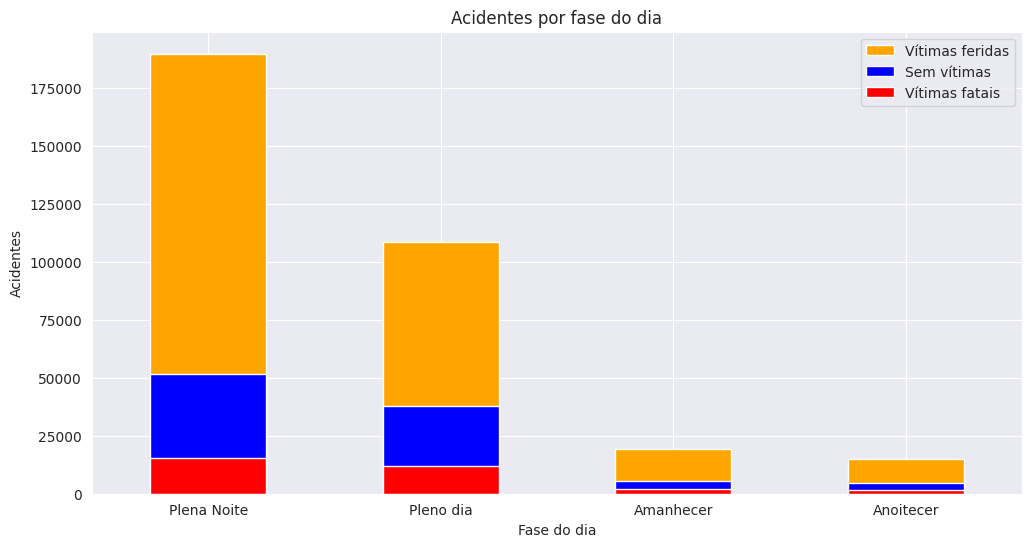

In [ ]:
plt.figure(figsize=FIGSIZE)
df.query('classificacao_acidente == "Com Vítimas Feridas"')['fase_dia'].value_counts().plot(kind='bar', color='orange', label='Vítimas feridas')
df.query('classificacao_acidente == "Sem Vítimas"')['fase_dia'].value_counts().plot(kind='bar', color='blue', label='Sem vítimas')
df.query('classificacao_acidente == "Com Vítimas Fatais"')['fase_dia'].value_counts().plot(kind='bar', color='red', label='Vítimas fatais')

plt.title('Acidentes por fase do dia')
plt.xlabel('Fase do dia')
plt.ylabel('Acidentes')
plt.xticks(rotation=0)
plt.legend()
plt.show()

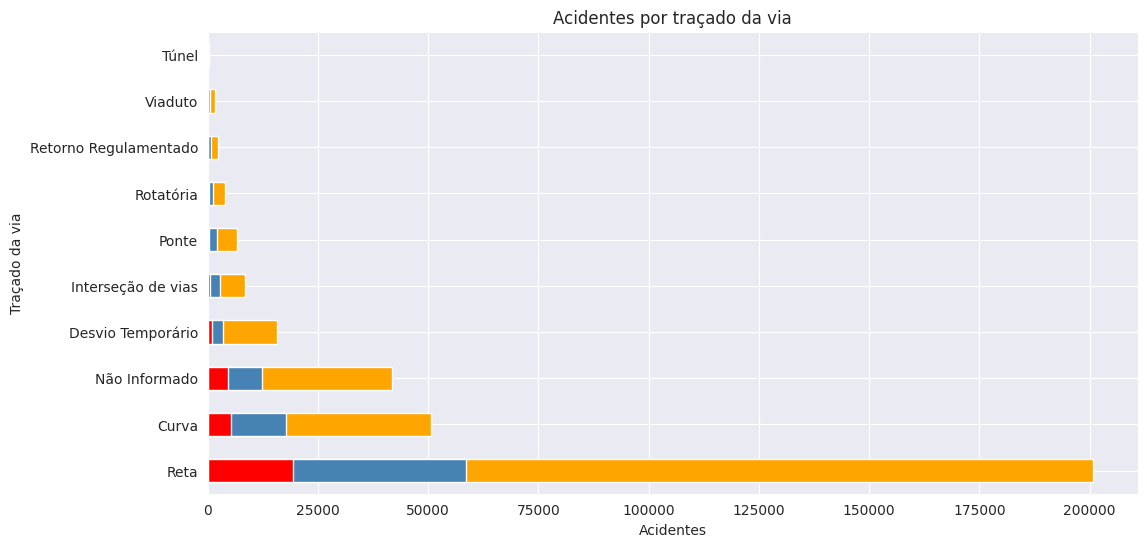

In [ ]:
plt.figure(figsize=FIGSIZE)
df.query('classificacao_acidente == "Com Vítimas Feridas"')['tracado_via'].value_counts().plot(kind='barh', color='orange')
df.query('classificacao_acidente == "Sem Vítimas"')['tracado_via'].value_counts().plot(kind='barh', color='steelblue')
df.query('classificacao_acidente == "Com Vítimas Fatais"')['tracado_via'].value_counts().plot(kind='barh', color='red')
plt.title('Acidentes por traçado da via')
plt.xlabel('Acidentes')
plt.ylabel('Traçado da via')
plt.show()

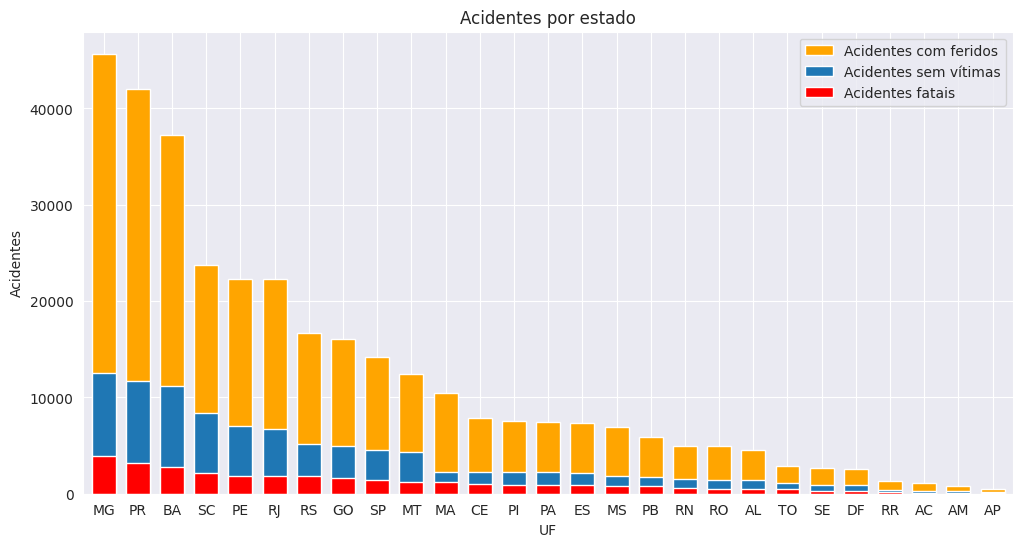

In [ ]:
df.query('classificacao_acidente == "Com Vítimas Feridas"')['uf'].value_counts().plot(kind='bar', color='orange', width=0.7, figsize=FIGSIZE, label = 'Acidentes com feridos')
df.query('classificacao_acidente == "Sem Vítimas"')['uf'].value_counts().plot(kind='bar', width=0.7, figsize=FIGSIZE, label = 'Acidentes sem vítimas')
df.query('classificacao_acidente == "Com Vítimas Fatais"')['uf'].value_counts().plot(kind='bar', color='red', width=0.7, figsize=FIGSIZE, label='Acidentes fatais')
plt.title('Acidentes por estado')
plt.xlabel('UF')
plt.ylabel('Acidentes')
plt.xticks(rotation=0)
plt.legend()
plt.show()

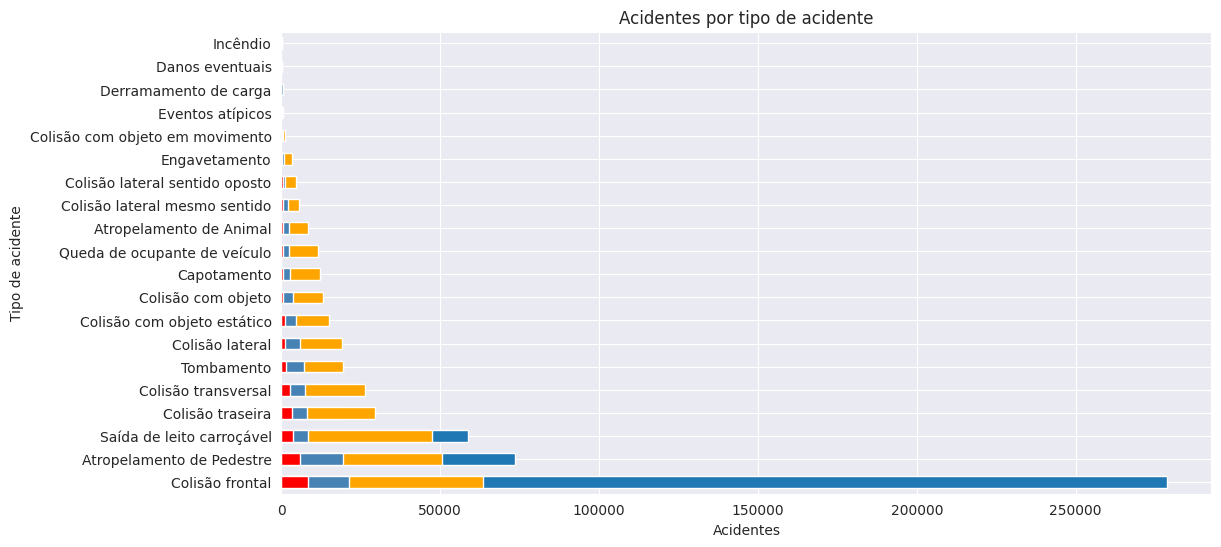

In [ ]:
plt.figure(figsize=FIGSIZE)
df['tracado_via'].value_counts().plot(kind='barh')
df.query('classificacao_acidente == "Com Vítimas Feridas"')['tipo_acidente'].value_counts().plot(kind='barh', color='orange')
df.query('classificacao_acidente == "Sem Vítimas"')['tipo_acidente'].value_counts().plot(kind='barh', color='steelblue')
df.query('classificacao_acidente == "Com Vítimas Fatais"')['tipo_acidente'].value_counts().plot(kind='barh', color='red')
plt.title('Acidentes por tipo de acidente')
plt.xlabel('Acidentes')
plt.ylabel('Tipo de acidente')
plt.show()

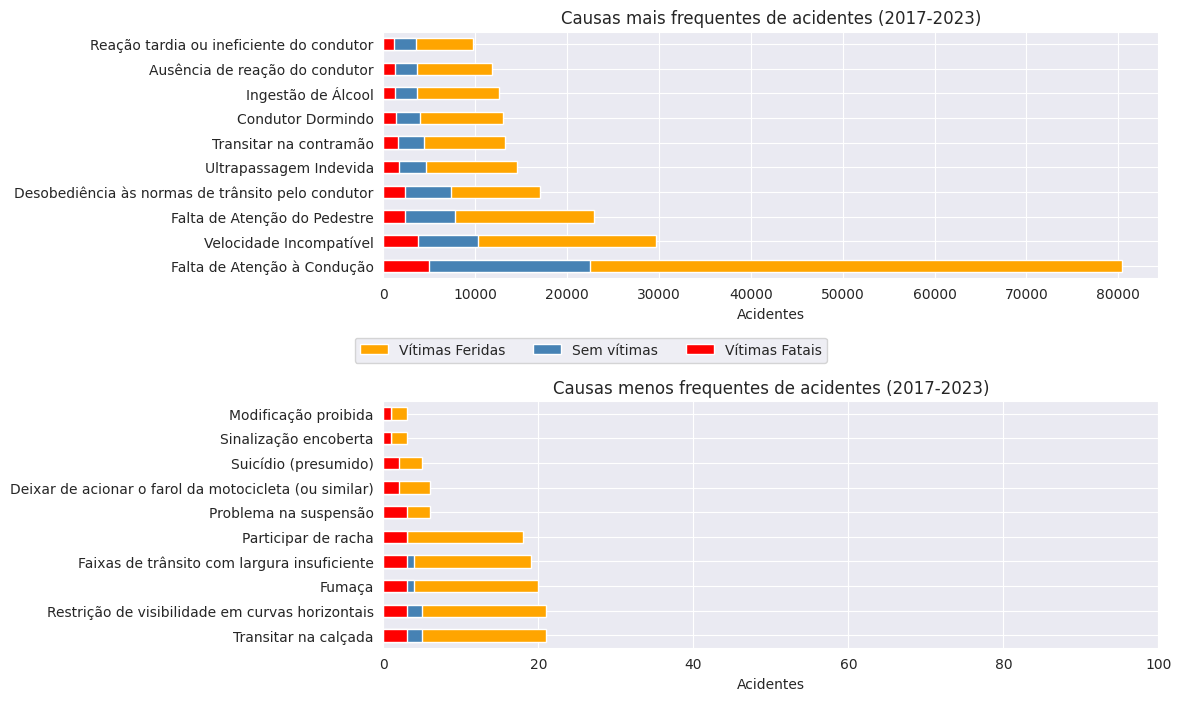

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
fig.subplots_adjust(hspace=0.5)

df.query('classificacao_acidente == "Com Vítimas Feridas"')['causa_acidente'].value_counts().head(10).plot(kind='barh', label='Vítimas feridas', color='orange', ax=ax[0])
df.query('classificacao_acidente == "Sem Vítimas"')['causa_acidente'].value_counts().head(10).plot(kind='barh', label='Sem vítimas', color='steelblue', ax=ax[0])
df.query('classificacao_acidente == "Com Vítimas Fatais"')['causa_acidente'].value_counts().head(10).plot(kind='barh', label='Vítimas fatais', color='red', ax=ax[0])
ax[0].set_title('Causas mais frequentes de acidentes (2017-2023)')
ax[0].set_xlabel('Acidentes')
ax[0].set_ylabel('')

df.query('classificacao_acidente == "Com Vítimas Feridas"')['causa_acidente'].value_counts().tail(10).plot(kind='barh', label='Vítimas feridas', color='orange', ax=ax[1])
df.query('classificacao_acidente == "Sem Vítimas"')['causa_acidente'].value_counts().tail(10).plot(kind='barh', label='Sem vítimas', color='steelblue', ax=ax[1])
df.query('classificacao_acidente == "Com Vítimas Fatais"')['causa_acidente'].value_counts().tail(10).plot(kind='barh', label='Vítimas fatais', color='red', ax=ax[1])
ax[1].set_title('Causas menos frequentes de acidentes (2017-2023)')
ax[1].set_xlabel('Acidentes')
ax[1].set_ylabel('')
ax[1].set_xlim((0,100))
#ax[1].legend()


fig.legend(labels=['Vítimas Feridas', 'Sem vítimas', 'Vítimas Fatais'], ncols=3, loc='center')
plt.show()

In [ ]:
# Função para plotar histograma e boxplot no mesmo gráfico
def histbox(dados, coluna, xlabel='', ylabel='Frequência', title='', color='steelblue', size=(12, 6), bins=10):

    # Media e quartis
    media = dados[coluna].mean()
    quartis = dados[coluna].quantile([0.25, 0.5, 0.75])

    fig, ax = plt.subplots(2, 1, figsize=size, sharex=True, gridspec_kw={
                           'height_ratios': (0.10, 0.90)})
    plt.subplots_adjust(wspace=0.0, hspace=0.02)

    # Histograma
    sns.histplot(dados, x=coluna, ax=ax[1], color=color, bins=bins)
    ax[0].set_title(title)
    ax[1].axvline(quartis[0.25], color='purple', linestyle='--',
                  linewidth=1, label=f'1º Quartil: {quartis[0.25]:.2f}')
    ax[1].axvline(media, color='red', linestyle='--',
                  linewidth=1, label=f'Média: {media:.2f}')
    ax[1].axvline(quartis[0.5], color='green', linestyle='--',
                  linewidth=1, label=f'Mediana: {quartis[0.5]:.2f}')
    ax[1].axvline(quartis[0.75], color='purple', linestyle='--',
                  linewidth=1, label=f'3º Quartil: {quartis[0.75]:.2f}')
    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel(ylabel)
    ax[1].legend()

    # Boxplot
    sns.boxplot(dados, x=coluna, ax=ax[0], color=color)
    ax[0].axvline(media, color='red', linestyle='--',
                  linewidth=1, label=f'Média: {media:.2f}')

    fig.show()

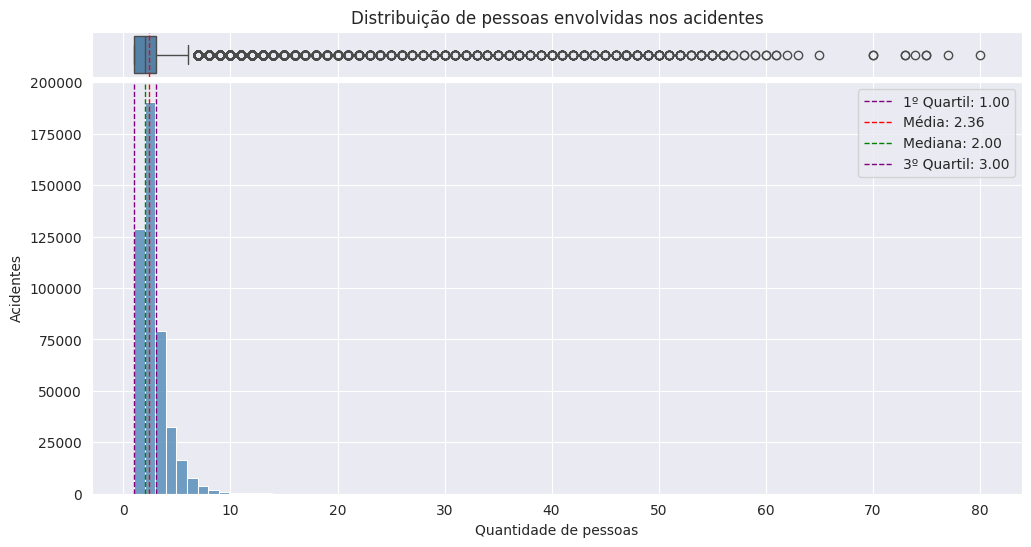

In [ ]:
histbox(df, 'pessoas', title='Distribuição de pessoas envolvidas nos acidentes', bins=80, xlabel='Quantidade de pessoas', ylabel='Acidentes', size=FIGSIZE)

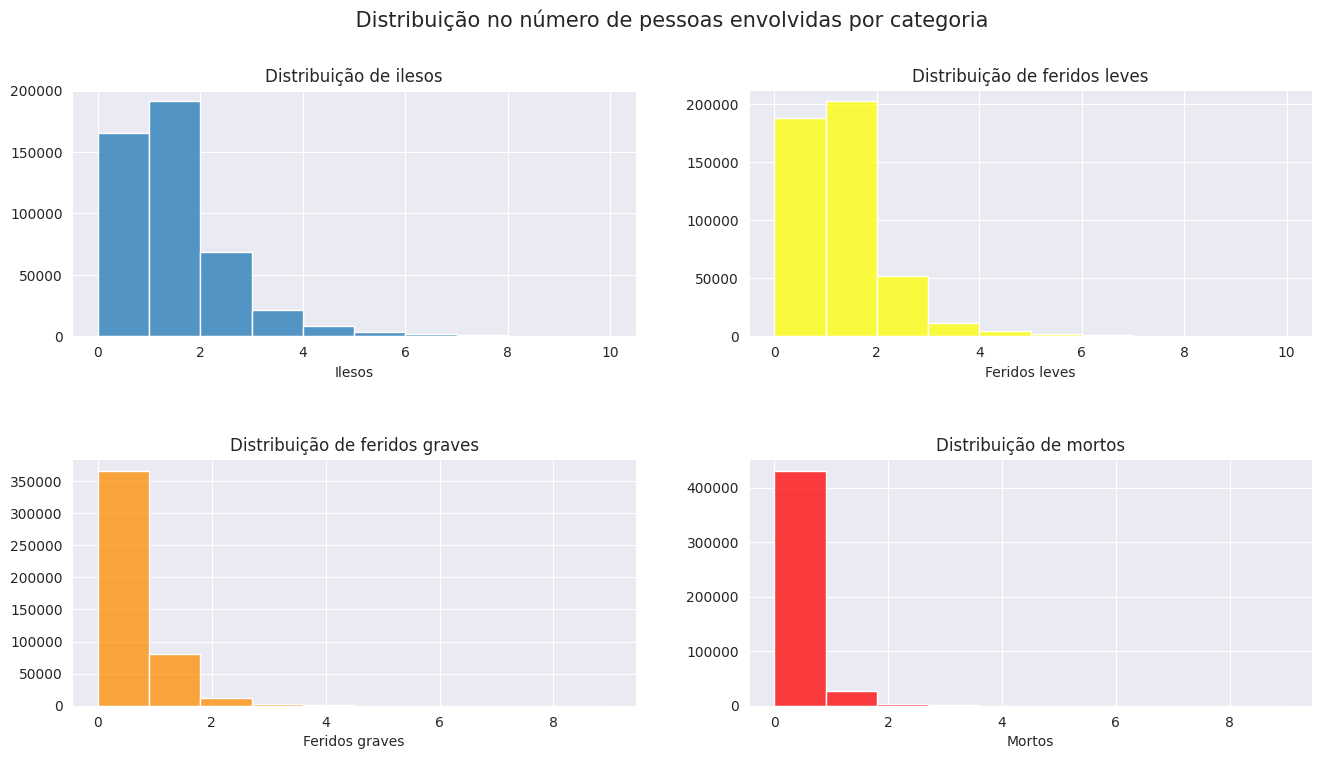

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
fig.subplots_adjust(hspace=0.5)

sns.histplot(data=df.query('pessoas <= 10'), x='ilesos', bins=10, ax=ax[0,0])
ax[0,0].set_title('Distribuição de ilesos')
ax[0,0].set_ylabel('')
ax[0,0].set_xlabel('Ilesos')

sns.histplot(data=df.query('pessoas <= 10'), x='feridos_leves', bins=10, ax=ax[0,1], color='yellow')
ax[0,1].set_title('Distribuição de feridos leves')
ax[0,1].set_ylabel('')
ax[0,1].set_xlabel('Feridos leves')

sns.histplot(data=df.query('pessoas <= 10'), x='feridos_graves', bins=10, ax=ax[1,0], color='darkorange')
ax[1,0].set_title('Distribuição de feridos graves')
ax[1,0].set_ylabel('')
ax[1,0].set_xlabel('Feridos graves')

sns.histplot(data=df.query('pessoas <= 10'), x='mortos', bins=10, ax=ax[1,1], color='red')
ax[1,1].set_title('Distribuição de mortos')
ax[1,1].set_ylabel('')
ax[1,1].set_xlabel('Mortos')
fig.suptitle(' Distribuição no número de pessoas envolvidas por categoria ', fontsize=15)

plt.show()

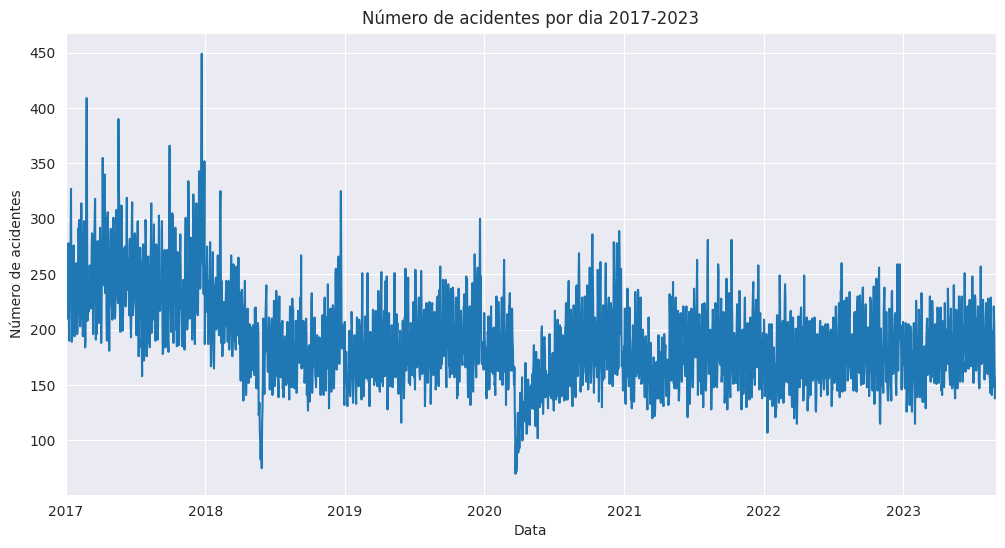

In [ ]:
# Visualizando o número de acidentes em todo o período
plt.figure(figsize=FIGSIZE)
df.groupby('data_inversa').count()['dia_semana'].plot()
plt.title('Número de acidentes por dia 2017-2023')
plt.xlabel('Data')
plt.ylabel('Número de acidentes')
plt.show()

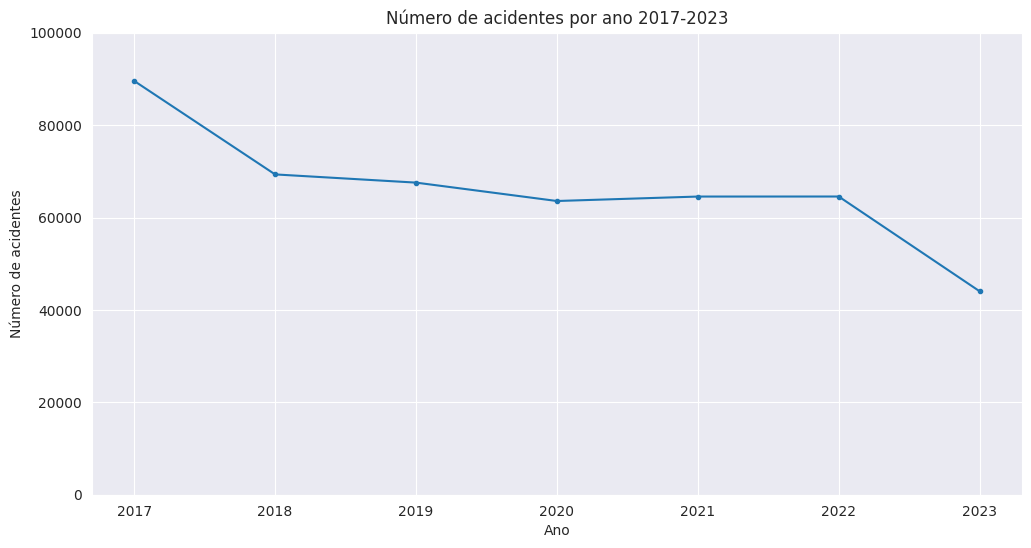

In [ ]:
# Agrupando o número de acidentes por ano
df.groupby('ano').count()['dia_semana'].plot(figsize=(12,6), marker='.')
plt.title('Número de acidentes por ano 2017-2023')
plt.xlabel('Ano')
plt.ylim((0,100_000))
plt.ylabel('Número de acidentes')
plt.show()

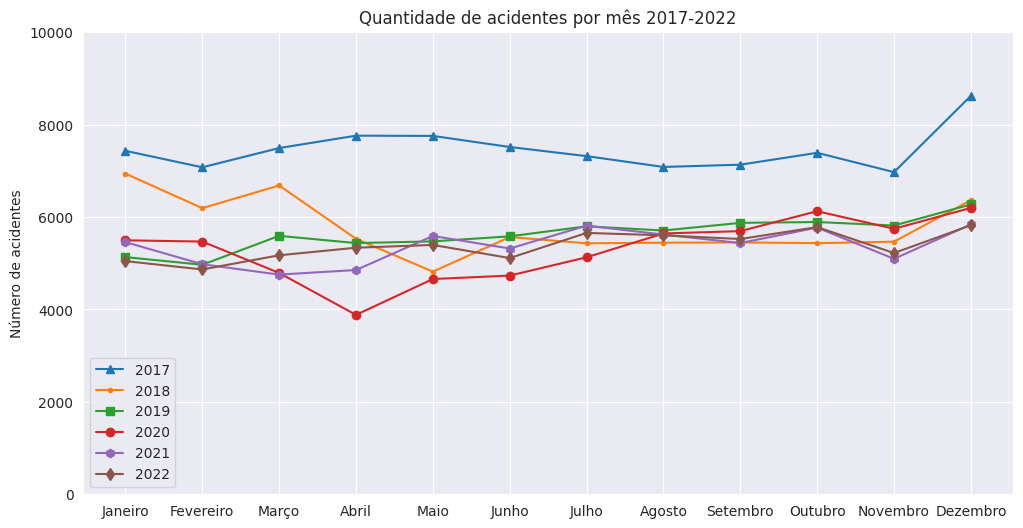

In [ ]:
# Pegando o número de acidentes por mês ao longo dos anos
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

plt.figure(figsize=FIGSIZE)

df.query(f'ano == 2017').groupby('mes').count()['dia_semana'].plot(marker='^', label='2017')
df.query(f'ano == 2018').groupby('mes').count()['dia_semana'].plot(marker='.', label='2018')
df.query(f'ano == 2019').groupby('mes').count()['dia_semana'].plot(marker='s', label='2019')
df.query(f'ano == 2020').groupby('mes').count()['dia_semana'].plot(marker='o', label='2020')
df.query(f'ano == 2021').groupby('mes').count()['dia_semana'].plot(marker='h', label='2021')
df.query(f'ano == 2022').groupby('mes').count()['dia_semana'].plot(marker='d', label='2022')

plt.xticks(ticks=range(1,13), labels=meses)
plt.xlabel('')
plt.ylabel('Número de acidentes')
plt.title('Quantidade de acidentes por mês 2017-2022')
plt.ylim((0,10_000))
plt.legend()
plt.show()

In [ ]:
# Selecionando apenas acidentes do Rio de Janeiro
df_rio = df.query('uf == "RJ"').copy()

In [ ]:
rows, cols = df_rio.shape

print(f'O dataset possui {rows} linhas e {cols} colunas')

O dataset possui 32233 linhas e 25 colunas


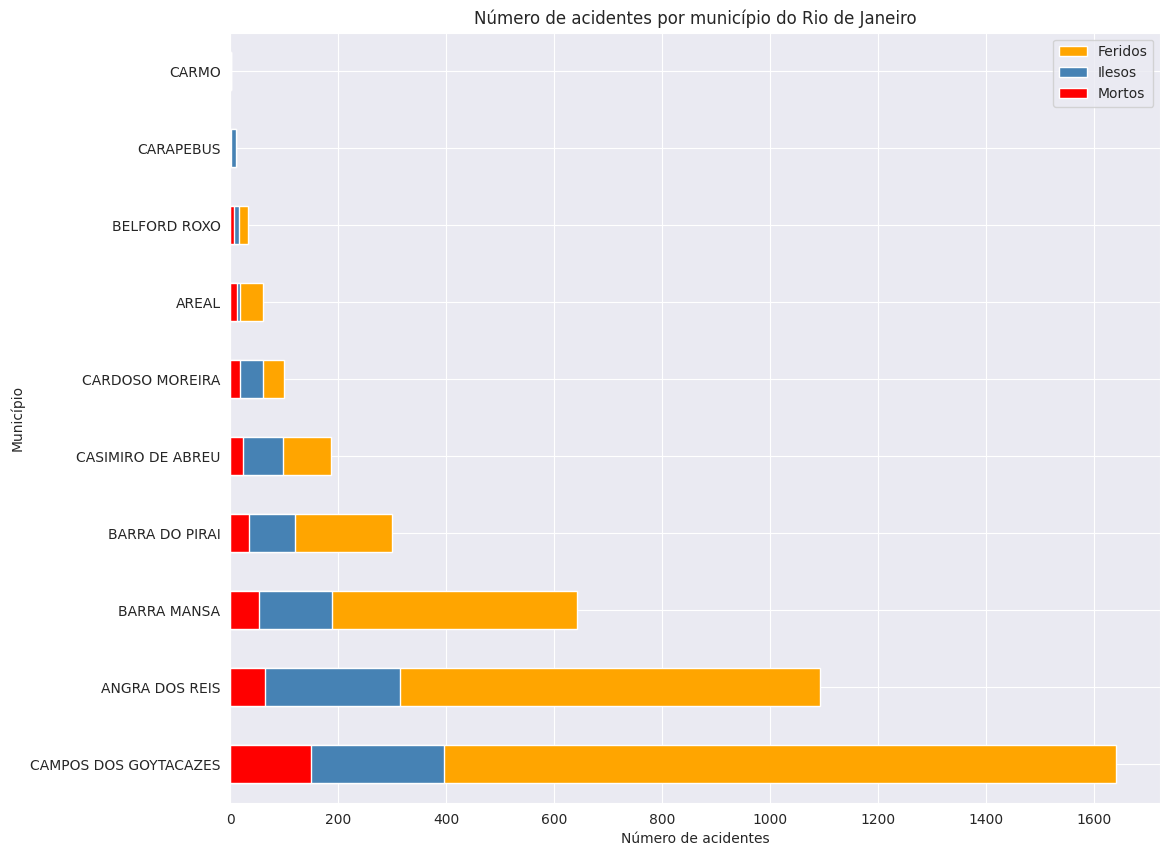

In [ ]:
# Agrupando por município
#df_rio.groupby('municipio').count()['data_inversa'].sort_values(ascending=False).head(15).plot(kind='barh', figsize=FIGSIZE)
df_rio.query('classificacao_acidente == "Com Vítimas Feridas"').groupby('municipio').count()['data_inversa'].head(10).sort_values(ascending=False).plot(kind='barh',
                                                                                                                                               figsize=(12,10),
                                                                                                                                               color='orange',
                                                                                                                                               label='Feridos')
df_rio.query('classificacao_acidente == "Sem Vítimas"').groupby('municipio').count()['data_inversa'].head(10).sort_values(ascending=False).plot(kind='barh',
                                                                                                                                       figsize=(12,10),
                                                                                                                                       color='steelblue',
                                                                                                                                       label='Ilesos')
df_rio.query('classificacao_acidente == "Com Vítimas Fatais"').groupby('municipio').count()['data_inversa'].head(10).sort_values(ascending=False).plot(kind='barh',
                                                                                                                                              figsize=(12,10),
                                                                                                                                              color='red',
                                                                                                                                              label='Mortos')

plt.title('Número de acidentes por município do Rio de Janeiro')
plt.xlabel('Número de acidentes')
plt.ylabel('Município')
plt.legend()
plt.show()

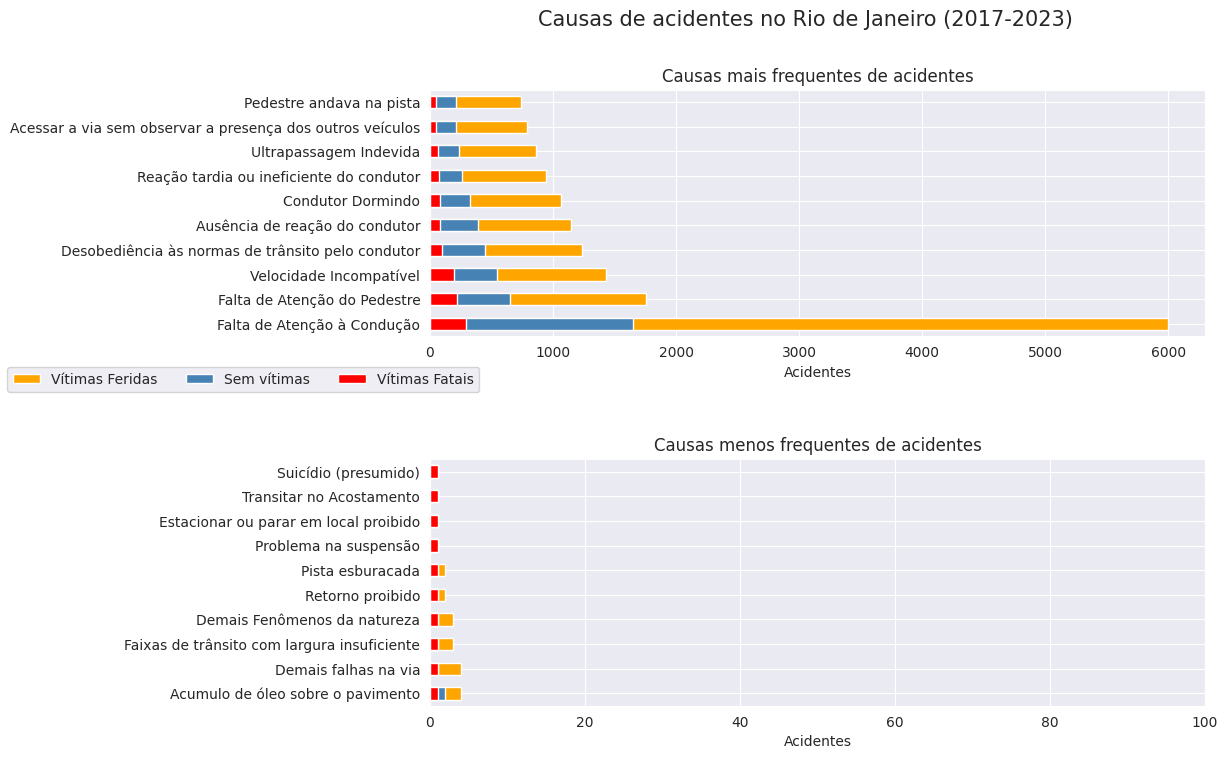

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
fig.subplots_adjust(hspace=0.5)

df_rio.query('classificacao_acidente == "Com Vítimas Feridas"')['causa_acidente'].value_counts().head(10).plot(kind='barh', label='Vítimas feridas', color='orange', ax=ax[0])
df_rio.query('classificacao_acidente == "Sem Vítimas"')['causa_acidente'].value_counts().head(10).plot(kind='barh', label='Sem vítimas', color='steelblue', ax=ax[0])
df_rio.query('classificacao_acidente == "Com Vítimas Fatais"')['causa_acidente'].value_counts().head(10).plot(kind='barh', label='Vítimas fatais', color='red', ax=ax[0])
ax[0].set_title('Causas mais frequentes de acidentes')
ax[0].set_xlabel('Acidentes')
ax[0].set_ylabel('')

df_rio.query('classificacao_acidente == "Com Vítimas Feridas"')['causa_acidente'].value_counts().tail(10).plot(kind='barh', label='Vítimas feridas', color='orange', ax=ax[1])
df_rio.query('classificacao_acidente == "Sem Vítimas"')['causa_acidente'].value_counts().tail(10).plot(kind='barh', label='Sem vítimas', color='steelblue', ax=ax[1])
df_rio.query('classificacao_acidente == "Com Vítimas Fatais"')['causa_acidente'].value_counts().tail(10).plot(kind='barh', label='Vítimas fatais', color='red', ax=ax[1])
ax[1].set_title('Causas menos frequentes de acidentes')
ax[1].set_xlabel('Acidentes')
ax[1].set_ylabel('')
ax[1].set_xlim((0,100))



fig.legend(labels=['Vítimas Feridas', 'Sem vítimas', 'Vítimas Fatais'], ncols=3, loc='center left')
fig.suptitle('Causas de acidentes no Rio de Janeiro (2017-2023)', fontsize=15)
plt.show()

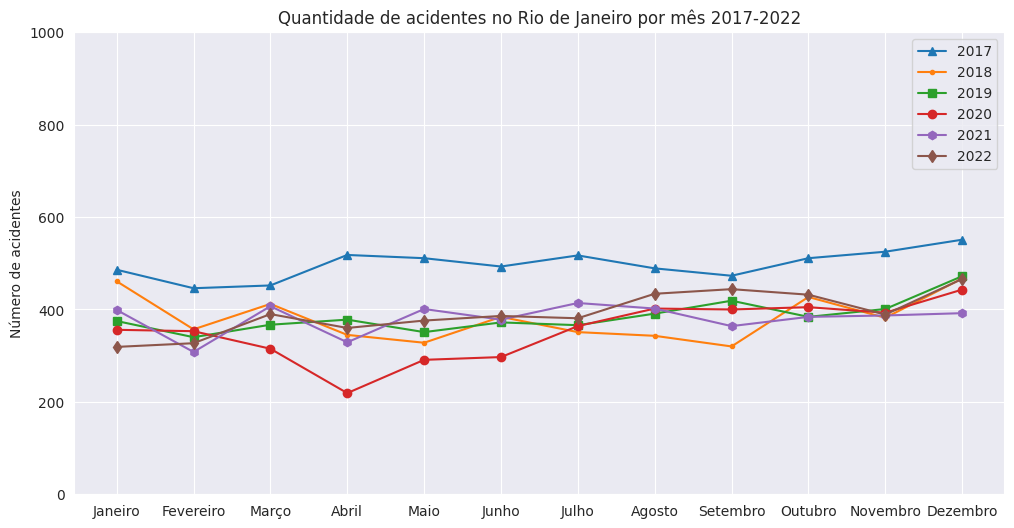

In [ ]:
# Pegando o número de acidentes por mês ao longo dos anos
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

plt.figure(figsize=FIGSIZE)

df_rio.query(f'ano == 2017').groupby('mes').count()['dia_semana'].plot(marker='^', label='2017')
df_rio.query(f'ano == 2018').groupby('mes').count()['dia_semana'].plot(marker='.', label='2018')
df_rio.query(f'ano == 2019').groupby('mes').count()['dia_semana'].plot(marker='s', label='2019')
df_rio.query(f'ano == 2020').groupby('mes').count()['dia_semana'].plot(marker='o', label='2020')
df_rio.query(f'ano == 2021').groupby('mes').count()['dia_semana'].plot(marker='h', label='2021')
df_rio.query(f'ano == 2022').groupby('mes').count()['dia_semana'].plot(marker='d', label='2022')

plt.xticks(ticks=range(1,13), labels=meses)
plt.xlabel('')
plt.ylabel('Número de acidentes')
plt.title('Quantidade de acidentes no Rio de Janeiro por mês 2017-2022')
plt.ylim((0, 1000))
plt.legend()
plt.show()

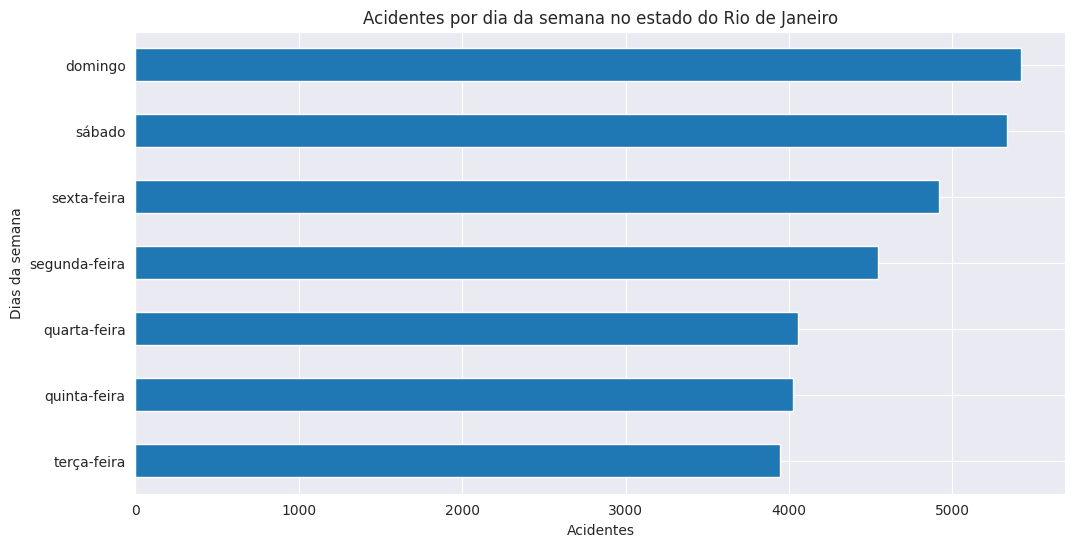

In [ ]:
# Analise dos dias da semana
x = df_rio['dia_semana'].value_counts().sort_values(ascending=True)

x.plot(kind='barh', figsize=FIGSIZE)
plt.xlabel('Acidentes')
plt.ylabel('Dias da semana')
plt.title('Acidentes por dia da semana no estado do Rio de Janeiro')
plt.show()

In [ ]:
# Tabela de contigência Causa de Acidentes x Dia da semana
pd.crosstab(df_rio['causa_acidente'], df_rio['dia_semana'], margins=True).sort_values(by='All', ascending=False).head(20)

dia_semana,domingo,quarta-feira,quinta-feira,segunda-feira,sexta-feira,sábado,terça-feira,All
causa_acidente,,,,,,,,
All,5421,4053,4023,4542,4917,5333,3944,32233
Falta de Atenção à Condução,1300,1053,1020,1068,1257,1290,956,7944
Velocidade Incompatível,509,288,279,328,351,467,274,2496
Reação tardia ou ineficiente do condutor,335,221,203,241,256,295,214,1765
Pista Escorregadia,250,171,181,249,277,235,185,1548
Desobediência às normas de trânsito pelo condutor,236,188,202,227,242,284,164,1543
Ausência de reação do condutor,254,176,174,217,210,234,180,1445
Defeito Mecânico no Veículo,186,187,178,180,183,188,176,1278
Condutor Dormindo,252,141,133,189,173,232,144,1264


In [ ]:
# Lendo arquivo GeoJson com os limites dos municipios do Rio
limites_rj = '/content/rio.geojson'

In [ ]:
# Coletando as coordenadas geográficas e o número de acidentes em cada ponto
coords = df_rio.groupby(['latitude', 'longitude']).count()['data_inversa'].reset_index().values.tolist()

In [ ]:
# Criando mapa do Rio de Janeiro
min_lon, max_lon = -45, -40
min_lat, max_lat = -23, -20

base_map = folium.Map(
    width='25%',
    height='25%',
    location = [-22.27, -42.47],
    zoom_start=9,
    min_lat=min_lat,
    max_lat=max_lat,
    min_lon=min_lon,
    max_lon=max_lon
)

# Alterando contorno e opacidade dos limites de municipios
estilo = lambda x: {'color':'black',
                    'fillOpacity': 0,
                    'weight':1}

# Adicionando os limites dos municípios
folium.GeoJson(limites_rj,
               style_function = estilo,
               name='Municípios RJ').add_to(base_map)

MousePosition().add_to(base_map)

# Adicionando o mapa de calor de acidentes por área
HeatMap(coords,
        radius=10,
        blur=10).add_to(base_map)

In [ ]:
# Adicionando um título ao mapa
# HTML para o título
titulo_html = '''
     <div style="
     position: fixed;
     top: 10px; left: 50%;
     transform: translate(-50%, 0%);
     font-size: 20px; font-weight: bold;
     background-color: white; padding: 10px;
     border-radius: 8px; box-shadow: 0 0 15px rgba(0,0,0,0.2);
     z-index: 1000;">
     Mapa de calor de acidentes por área do município do Rio de Janeiro 2017-2022
     </div>
     '''

# Adiciona o título ao mapa
base_map.get_root().html.add_child(folium.Element(titulo_html))

In [ ]:
base_map

In [ ]:
# Coletando dados segmentados por ano
coords1 = []
anos = [2017, 2018, 2019, 2020, 2021, 2022]

for ano in anos:
  print(ano)
  coords1.append(df_rio.query('ano == @ano').groupby(['latitude', 'longitude']).count()['data_inversa'].reset_index().values.tolist())

2017
2018
2019
2020
2021
2022


In [ ]:
from folium.plugins import HeatMapWithTime

In [ ]:
# Criando mapa de evolução dos acidentes entre 2017-2018
map = folium.Map(
    width='25%',
    height='25%',
    location = [-22.27, -42.47],
    zoom_start=9,
    min_lat=min_lat,
    max_lat=max_lat,
    min_lon=min_lon,
    max_lon=max_lon
)

# Adicionando os limites dos municípios
folium.GeoJson(limites_rj,
               style_function = estilo,
               name='Municípios RJ').add_to(map)

# Mapa de calor animado
HeatMapWithTime(data=coords1,
                index=anos,
                radius=10,
                gradient = {0.1:'blue', 0.25:'green', 0.5:'yellow',
                            0.75:'orange', 1:'red'},
                min_opacity=0.3,
                max_opacity=1,
                use_local_extrema=True,
                auto_play=True,
              ).add_to(map)

titulo2 = '''
     <div style="
     position: fixed;
     top: 10px; left: 50%;
     transform: translate(-50%, 0%);
     font-size: 20px; font-weight: bold;
     background-color: white; padding: 10px;
     border-radius: 8px; box-shadow: 0 0 15px rgba(0,0,0,0.2);
     z-index: 1000;">
     Evolução do número de acidentes por área do município do Rio de Janeiro 2017-2022
     </div>
     '''

map.get_root().html.add_child(folium.Element(titulo2))

In [ ]:
map

In [ ]:
map.save('mapa_calor_animado.html')

In [ ]:
x = df['municipio'].value_counts().sort_values(ascending=True)

x.plot(kind='barh', figsize=FIGSIZE)
plt.xlabel('Acidentes')
plt.ylabel('Dias da semana')
plt.title('Acidentes por dia da semana')
plt.show()

NameError: name 'df' is not defined